In [60]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 1. return

In [81]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
# change algorithm to either td3 or ppo
#----------------------------------------------------

import glob
interval = ["point125","point25","point5","point75"]
itv = interval[0]
algorithm = "td3" # "ppo"
txt_dir = "../SHARCNET/Results/debug/"+algorithm+"/"+itv+"/"
modes = ["SARA","PLA"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(txt_dir+ mode + "/**/" +"*.txt", recursive=True)
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 5 files found
../SHARCNET/Results/debug/td3/point125/SARA\2019-09-18-001231-1-0\td3\td3_s0\progress.txt
../SHARCNET/Results/debug/td3/point125/SARA\2019-09-18-132954-0-0\td3\td3_s0\progress.txt
../SHARCNET/Results/debug/td3/point125/SARA\2019-09-18-132954-1-1\td3\td3_s0\progress.txt
../SHARCNET/Results/debug/td3/point125/SARA\2019-09-19-095851-0-0\td3\td3_s0\progress.txt
../SHARCNET/Results/debug/td3/point125/SARA\2019-09-19-095851-1-0\td3\td3_s0\progress.txt
PLA: 2 files found
../SHARCNET/Results/debug/td3/point125/PLA\2019-09-18-134802-0-0\td3\td3_s0\progress.txt
../SHARCNET/Results/debug/td3/point125/PLA\2019-09-18-134815-1-0\td3\td3_s0\progress.txt


In [82]:
all_combined_data = dict()
if algorithm == "ppo":
    metrics = ["AverageEpRet", "AverageVVals"]
    col_names = ["return", "V_means"]
else:
    metrics = ["AverageEpRet", "AverageQ1Vals", "AverageQ2Vals"]
    col_names = ["return","Q1_means","Q2_means"]
for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file, sep="\t"))
    
    mode_combined_data = pd.DataFrame()
    for metric, col_name in zip(metrics, col_names):
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[col_name+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[col_name+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[col_name+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [83]:
all_combined_data['SARA']

,return_run0,return_run1,return_run2,return_run3,return_run4,return_avg,return_std,Q1_means_run0,Q1_means_run1,Q1_means_run2,...,Q1_means_run4,Q1_means_avg,Q1_means_std,Q2_means_run0,Q2_means_run1,Q2_means_run2,Q2_means_run3,Q2_means_run4,Q2_means_avg,Q2_means_std
0,8.724349,2.712374,7.138214,4.592087,8.683332,6.370071,2.367438,0.298030,0.064104,0.248081,...,0.342197,0.224562,0.098457,0.295575,0.068825,0.252924,0.167694,0.337017,0.224407,0.095897
1,5.931713,6.195393,7.506299,6.031478,4.780126,6.089002,0.867324,0.262987,0.148589,0.266954,...,0.304872,0.238834,0.054161,0.264167,0.147775,0.272108,0.211064,0.302375,0.239498,0.054492
2,4.586162,8.483454,6.705572,7.300641,10.494880,7.514142,1.954318,0.246644,0.211965,0.289688,...,0.318621,0.263661,0.036907,0.242469,0.217777,0.290041,0.246365,0.313594,0.262049,0.034727
3,11.491975,12.911436,6.748081,9.981396,8.241672,9.874912,2.204144,0.301999,0.333928,0.330128,...,0.357249,0.327047,0.019105,0.302880,0.336409,0.331917,0.309769,0.359605,0.328116,0.020240
4,12.459289,7.610375,8.946601,10.678440,10.477157,10.034372,1.646214,0.394622,0.400267,0.405705,...,0.364007,0.385736,0.018056,0.391657,0.398168,0.407683,0.364646,0.360356,0.384502,0.018722
5,11.193508,4.341746,6.207433,3.848000,11.117740,7.341685,3.212075,0.453011,0.429110,0.457602,...,0.413012,0.425973,0.029309,0.451962,0.431200,0.457586,0.377334,0.410976,0.425812,0.029301
6,11.072287,11.739511,6.547023,9.557106,6.876404,9.158466,2.121832,0.514125,0.519880,0.522100,...,0.424221,0.483494,0.043392,0.514161,0.520640,0.524176,0.435067,0.425861,0.483981,0.043911
7,5.438896,7.879298,6.741012,8.773824,10.385413,7.843688,1.692673,0.569963,0.583966,0.582467,...,0.460261,0.542067,0.048299,0.569737,0.582155,0.581003,0.512953,0.458272,0.540824,0.048477
8,6.483774,9.789116,11.057660,9.837234,7.390583,8.911673,1.699426,0.652188,0.664739,0.692116,...,0.462188,0.618618,0.081409,0.651073,0.664293,0.692650,0.621432,0.462502,0.618390,0.081240
9,14.302505,7.944484,6.962545,10.164150,7.740367,9.422810,2.661953,0.806912,0.718864,0.811439,...,0.525800,0.709189,0.104326,0.805402,0.721826,0.813716,0.685550,0.525375,0.710374,0.104577


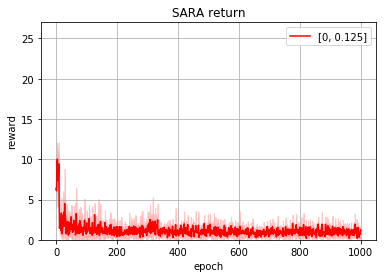

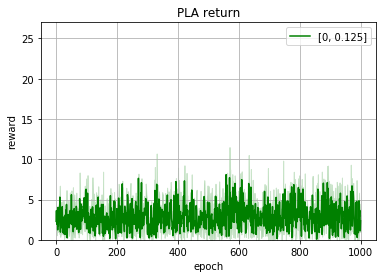

In [84]:
# Plot return
colors = ['r','g','b']
metric = "return"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(data.index, data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(data.index, data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig("./plots_for_thesis/debug/"+algorithm+"/"+"{}_{}_{}.png".format(itv,mode,metric), bbox_inches='tight')


### 2. V_mean

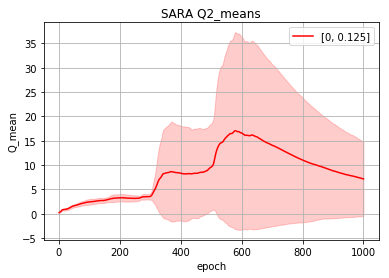

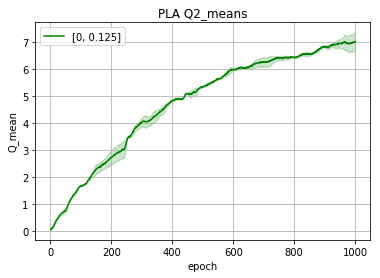

In [86]:
colors = ['r','g','b']
metric = "Q2_means"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):
    plt.figure()
    plt.grid()
    data = all_combined_data[mode]
    length = data.shape[0]
    label = "[0, "+itv.replace("point","0.")+"]"
    plt.fill_between(np.linspace(1,1000,length), data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,1000,length), data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("Q_mean")
    plt.savefig('./plots_for_thesis/debug/'+algorithm+'/{}_{}_{}.png'.format(itv,mode,metric), bbox_inches='tight')
    